### Exploring time series

A time series is a sequence of data points collected at regular time intervals, typically ordered chronologically. It's used to analyze and understand how a variable changes over time, with characteristics like autocorrelation, seasonality, and trends. 

##### python dateime

https://docs.python.org/3/library/datetime.html

##### poisson random distributuion

https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html




#### Loading time series data

Sample data from https://datahub.io/core/co2-ppm


In [43]:
import pandas as pd

#df=pd.read_csv("https://datahub.io/core/co2-ppm/r/co2-mm-mlo.csv")

# skip junk rows ref: https://www.statology.org/pandas-skip-rows/
# limit number of rows read in: https://stackoverflow.com/questions/23853553/python-pandas-how-to-read-only-first-n-rows-of-csv-files-in
df=pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv",skiprows=23,low_memory=False,nrows=1000)
df['date'] # results 'object' datatype
#df.describe()

0      10-apr-1996 14:00
1      31-jul-1996 08:00
2      31-jul-1996 09:00
3      31-jul-1996 10:00
4      31-jul-1996 11:00
             ...        
995    10-sep-1996 18:00
996    10-sep-1996 19:00
997    10-sep-1996 20:00
998    10-sep-1996 21:00
999    10-sep-1996 22:00
Name: date, Length: 1000, dtype: object

In [48]:
pd.to_datetime(df['Date']) # converts to 'datetime' datatype

KeyError: 'Date'

In [49]:
#creating a new column and populate with dates in datetime format
df['datetime']=pd.to_datetime(df['date'])
#df


In [50]:
df['datetime']

0     1996-04-10 14:00:00
1     1996-07-31 08:00:00
2     1996-07-31 09:00:00
3     1996-07-31 10:00:00
4     1996-07-31 11:00:00
              ...        
995   1996-09-10 18:00:00
996   1996-09-10 19:00:00
997   1996-09-10 20:00:00
998   1996-09-10 21:00:00
999   1996-09-10 22:00:00
Name: datetime, Length: 1000, dtype: datetime64[ns]

Pandas can only 'see' time series if the datatype is time serties

<AxesSubplot:xlabel='year', ylabel='passengers'>

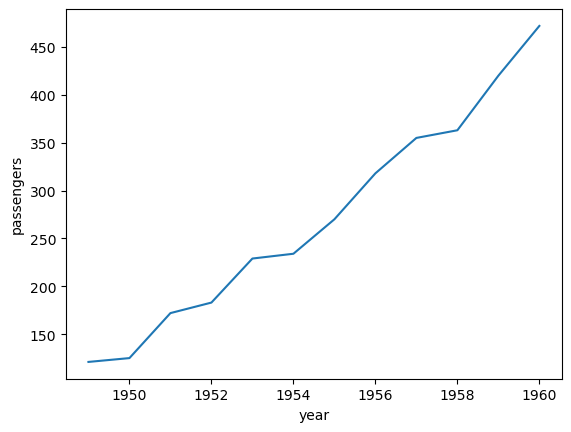

In [ ]:
#visualise time series publish_display_data
#https://seaborn.pydata.org/generated/seaborn.lineplot.html
#SAMPLE from Seaborn documentation.
import seaborn as sns
flights = sns.load_dataset("flights")
flights.head()
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

In [51]:
df.columns

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt', 'datetime'],
      dtype='object')

<AxesSubplot:xlabel='datetime', ylabel='temp'>

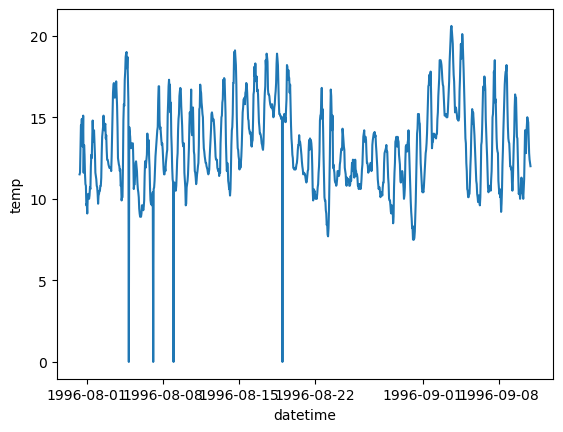

In [53]:
#Apply to the CO2 data.
import seaborn as sns
sns.lineplot(data=df[1:], x="datetime", y="temp") # with [1:] it reads from row one
#sns.lineplot(data=df, x="datetime", y="rain")

#### Simulating time series data with numpy and pandas (synthesize random data)

In [8]:
import pandas as pd
import numpy as np

In [7]:
#for time series visualisation we need an index of dates or times as a starting point.
#https://pandas.pydata.org/docs/reference/api/pandas.date_range.html

#create index with dates from "2018-01-01" 72x dates, frequency is H (hours) 
idx = pd.date_range("2018-01-01", periods=72, freq="H")
idx

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               '2018-01-01 10:00:00', '2018-01-01 11:00:00',
               '2018-01-01 12:00:00', '2018-01-01 13:00:00',
               '2018-01-01 14:00:00', '2018-01-01 15:00:00',
               '2018-01-01 16:00:00', '2018-01-01 17:00:00',
               '2018-01-01 18:00:00', '2018-01-01 19:00:00',
               '2018-01-01 20:00:00', '2018-01-01 21:00:00',
               '2018-01-01 22:00:00', '2018-01-01 23:00:00',
               '2018-01-02 00:00:00', '2018-01-02 01:00:00',
               '2018-01-02 02:00:00', '2018-01-02 03:00:00',
               '2018-01-02 04:00:00', '2018-01-02 05:00:00',
               '2018-01-02 06:00:00', '2018-01-02 07:00:00',
               '2018-01-

In [9]:
rng=np.random.default_rng()

In [21]:
#create a random dataframe with idx as time series index and 
#a random number fromn random generator and length of idx
ts=pd.DataFrame(data=rng.random(len(idx)),index=idx,columns=["admissions"])
ts

,admissions
2018-01-01 00:00:00,0.728680
2018-01-01 01:00:00,0.920355
2018-01-01 02:00:00,0.795507
2018-01-01 03:00:00,0.128939
2018-01-01 04:00:00,0.266536
...,...
2018-01-03 19:00:00,0.660792
2018-01-03 20:00:00,0.697022
2018-01-03 21:00:00,0.718992
2018-01-03 22:00:00,0.530523


#### Poisson probability distribution
The Poisson distribution is a probability distribution that models the number of events occurring in a fixed interval of time or space, given a known average rate of occurrence. It is often used to describe rare events that happen independently, such as the number of customer arrivals at a store in an hour.

NumPy: https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html

random.poisson(lam=1.0, size=None)<br>
**lam** is the average rate of events in a Poisson distribution.<br>
**size** determines how many random values you want to generate.





In [32]:
#create a random dataframe using poisson distribution with idx as time series index and 
#a random number fromn random generator and length of idx (generates data for each index)
ts=pd.DataFrame(data=rng.poisson(10,len(idx)),index=idx,columns=["admissions"])
ts

,admissions
2018-01-01 00:00:00,3
2018-01-01 01:00:00,10
2018-01-01 02:00:00,3
2018-01-01 03:00:00,7
2018-01-01 04:00:00,9
...,...
2018-01-03 19:00:00,8
2018-01-03 20:00:00,16
2018-01-03 21:00:00,9
2018-01-03 22:00:00,16


### Accessing and Grouping time series data

In [35]:
ts.mean() # get mean of admissions

admissions    9.555556
dtype: float64

In [39]:
#get values with .loc
ts.loc['2018-01-01 03:00:00'] #locate data at individuallabel

admissions    7
Name: 2018-01-01 03:00:00, dtype: int64

In [45]:
#get values with .loc
ts.loc['2018-01-01 03:00:00':'2018-01-01 11:00:00'] #locate data at a range

,admissions
2018-01-01 03:00:00,7
2018-01-01 04:00:00,9
2018-01-01 05:00:00,11
2018-01-01 06:00:00,12
2018-01-01 07:00:00,11
2018-01-01 08:00:00,5
2018-01-01 09:00:00,8
2018-01-01 10:00:00,6
2018-01-01 11:00:00,15


In [49]:
#get mean for a section of data
ts.loc['2018-01-01 03:00:00':'2018-01-02 18:00:00'].mean()

admissions    9.475
dtype: float64

In [54]:
ts.iloc[5:15].mean() # get section of data with iloc(coordinate not label based)

admissions    9.8
dtype: float64

#### Aggregation

##### Resampling:
Resampling is a statistical technique that involves selecting, rearranging, or generating new data samples from an existing dataset. 
**Bootstrapping**: In bootstrapping, you repeatedly draw random samples (with replacement) from your original dataset to create multiple new datasets. 

In [70]:
ts.resample("D").mean() #resample H frqency df to D (day) frequency


,admissions
2018-01-01,8.791667
2018-01-02,9.625000
2018-01-03,10.250000
